In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

In [3]:
file_path = "data/02_dsc_thermogram.csv"
df_experiments = pd.read_csv(file_path, index_col=0)
df_experiments.head()

,L001_S3,L001_S5,L002_S3,L002_S5,L003_S3,L003_S5,L004_S3,L004_S5,L005_S3,L005_S5,...,L383_S3,L383_S5,L384_S3,L384_S5,L385_S3,L385_S5,L386_S3,L386_S5,L387_S3,L387_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-24,-0.21989,0.16598,-0.20426,0.15589,-0.21713,0.15900,-0.19927,0.16244,-0.22834,0.17739,...,-0.18067,0.17461,-0.21344,0.19298,-0.19186,0.18028,-0.20261,0.19231,-0.20920,0.19564
-23,-0.22134,0.16647,-0.20408,0.15648,-0.21732,0.15971,-0.20029,0.16288,-0.22837,0.17797,...,-0.18135,0.17530,-0.21442,0.19361,-0.19282,0.18083,-0.20349,0.19302,-0.21002,0.19661
-22,-0.22069,0.16703,-0.20420,0.15707,-0.21706,0.16041,-0.20056,0.16350,-0.22794,0.17882,...,-0.18193,0.17578,-0.21536,0.19430,-0.19367,0.18136,-0.20438,0.19379,-0.21093,0.19738
-21,-0.22040,0.16769,-0.20415,0.15773,-0.21713,0.16099,-0.20061,0.16419,-0.22836,0.17962,...,-0.18263,0.17655,-0.21599,0.19511,-0.19413,0.18202,-0.20510,0.19448,-0.21164,0.19795
-20,-0.22059,0.16849,-0.20421,0.15857,-0.21691,0.16159,-0.20101,0.16484,-0.22840,0.18030,...,-0.18334,0.17710,-0.21663,0.19593,-0.19459,0.18269,-0.20588,0.19512,-0.21252,0.19866


In [4]:
columns_s5 = [col for col in df_experiments.columns if "_S5" in col]
df_experiments_s5 = df_experiments[columns_s5]
df_experiments_s5.head()

,L001_S5,L002_S5,L003_S5,L004_S5,L005_S5,L006_S5,L007_S5,L008_S5,L009_S5,L010_S5,...,L378_S5,L379_S5,L380_S5,L381_S5,L382_S5,L383_S5,L384_S5,L385_S5,L386_S5,L387_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-24,0.16598,0.15589,0.15900,0.16244,0.17739,0.15898,0.19158,0.12865,0.16992,0.15554,...,0.18864,0.17923,0.16501,0.17974,0.19352,0.17461,0.19298,0.18028,0.19231,0.19564
-23,0.16647,0.15648,0.15971,0.16288,0.17797,0.15965,0.19234,0.12905,0.17126,0.15602,...,0.18901,0.17957,0.16534,0.18038,0.19412,0.17530,0.19361,0.18083,0.19302,0.19661
-22,0.16703,0.15707,0.16041,0.16350,0.17882,0.16053,0.19321,0.12990,0.17218,0.15668,...,0.18936,0.17976,0.16552,0.18118,0.19484,0.17578,0.19430,0.18136,0.19379,0.19738
-21,0.16769,0.15773,0.16099,0.16419,0.17962,0.16126,0.19418,0.13042,0.17261,0.15750,...,0.18964,0.18014,0.16566,0.18214,0.19572,0.17655,0.19511,0.18202,0.19448,0.19795
-20,0.16849,0.15857,0.16159,0.16484,0.18030,0.16198,0.19513,0.13134,0.17323,0.15821,...,0.19009,0.18050,0.16584,0.18279,0.19643,0.17710,0.19593,0.18269,0.19512,0.19866


In [5]:
df_dsc = pd.read_csv("data/00_dsc.csv", index_col=0)
df_dsc.head()

,Probenbezeichnung,Konzentration_ppm,Matrix,Polymer,Alterung,mProben_mg,dHm_J/g,Tm_C
Nummer,,,,,,,,
L001,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,8.34,5.675,130.7
L002,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,8.49,4.522,130.8
L003,Mod.S-PE_1_25ppm,25,Modellsand,Polyethylen,NaN,7.86,5.084,130.7
L004,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,8.59,4.175,130.3
L005,Mod.S-PE_1_50ppm,50,Modellsand,Polyethylen,NaN,8.39,5.796,130.5


In [6]:
import matplotlib.pyplot as plt

def plot_dsc_values(df, columns, title="DSC Measurement Values"):
    """
    Plots the DSC measurement values for the given columns.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        columns (list of str): List of column names to plot.
    """
    if not isinstance(df.index, (pd.Index, pd.MultiIndex)):
        raise ValueError("The DataFrame index is not valid for plotting.")
    
    # Plotting
    plt.figure(figsize=(10, 6))
    for col in columns:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")
        plt.plot(df.index, df[col], label=col)
    
    plt.xlabel("Temperature (°C)")
    plt.ylabel("mw")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()



In [7]:
import matplotlib.pyplot as plt

def plot_dsc_values(df, columns, title="DSC Measurement Values"):
    """
    Plots the DSC measurement values for the given columns with a limited legend height.
    If the legend is too large, it adds "..." in the last row.

    Parameters:
        df (pd.DataFrame): The dataframe containing the data.
        columns (list of str): List of column names to plot.
        title (str): Title of the plot.
    """
    if not isinstance(df.index, (pd.Index, pd.MultiIndex)):
        raise ValueError("The DataFrame index is not valid for plotting.")
    
    # Plotting
    plt.figure(figsize=(10, 6))
    for col in columns:
        if col not in df.columns:
            raise ValueError(f"Column '{col}' not found in DataFrame.")
        plt.plot(df.index, df[col], label=col)

    plt.xlabel("Temperature (°C)")
    plt.ylabel("mw")
    plt.title(title)

    # Add legend with maximum height
    max_legend_entries = 20  # Maximum number of legend entries visible
    if len(columns) > max_legend_entries:
        displayed_columns = columns[:max_legend_entries - 1] + ['...']
    else:
        displayed_columns = columns

    # Custom legend
    handles, _ = plt.gca().get_legend_handles_labels()
    plt.legend(handles[:len(displayed_columns)], displayed_columns, loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)

    plt.tight_layout()
    plt.show()


In [8]:
def analyze_clusters_with_percentages(cluster_to_samples, df_dsc, column_name="Matrix"):
    """
    Analysiert die Verteilung einer angegebenen Spalte für Cluster in einem DataFrame und berechnet Anteile.
    Fügt 'Nicht vorhanden' hinzu, wenn fehlende Proben in einem Cluster existieren.
    
    Args:
        cluster_to_samples (dict): Dictionary mit Clustern und zugehörigen Proben.
        df_dsc (pd.DataFrame): DataFrame mit den Daten (Index muss die Proben enthalten).
        column_name (str): Name der Spalte, die analysiert werden soll.

    Returns:
        dict: Ergebnisse als Dictionary mit Clusternamen als Schlüssel und DataFrames mit Count und Anteil als Wert.
    """
    results = {}
    
    for cluster, samples in cluster_to_samples.items():
        # Entferne den Suffix "_S5", um die Proben zu matchen
        selected_samples = [s.split('_')[0] for s in samples]

        # Prüfe, welche Werte im Index vorhanden sind
        existing_samples = [s for s in selected_samples if s in df_dsc.index]

        # Finde die fehlenden Werte
        missing_samples = set(selected_samples) - set(existing_samples)

        # Filtere den DataFrame nur für die vorhandenen Proben
        filtered_df = df_dsc.loc[existing_samples]

        # Zähle die Werte in der angegebenen Spalte
        column_counts = filtered_df[column_name].value_counts()

        # Füge fehlende Werte als "Nicht vorhanden" hinzu, wenn es fehlende gibt
        if len(missing_samples) > 0:
            column_counts['Nicht vorhanden'] = len(missing_samples)

        # Berechne die Anteile
        total_samples = column_counts.sum()
        column_percentages = (column_counts / total_samples) * 100

        # Kombiniere Count und Anteile in einem DataFrame
        result_df = pd.DataFrame({
            'Count': column_counts,
            'Anteil (%)': column_percentages.round(2)
        })

        # Speichere die Ergebnisse im Dictionary
        results[cluster] = result_df
    
    return results



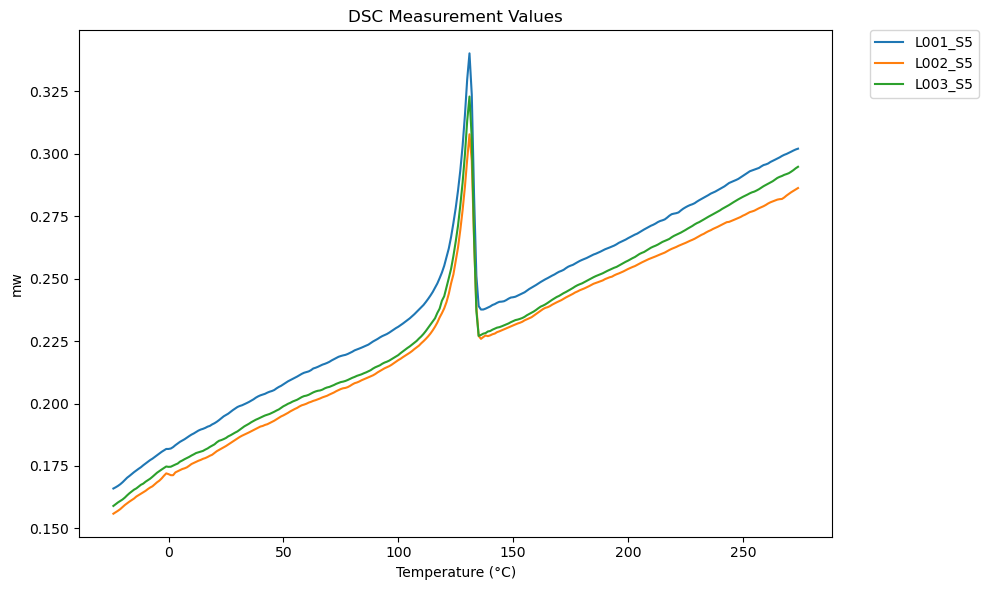

In [9]:
plot_dsc_values(df_experiments_s5, ['L001_S5', 'L002_S5', 'L003_S5'])

## I) Für Gesamtverlauf (-25 bis 275°C)

In [11]:
file_path = "data/040a_simple_clustering.csv"
df_clustering_simple = pd.read_csv(file_path, index_col=0)
df_clustering_simple.head()

,Probe,Cluster
0,L001_S5,2
1,L002_S5,2
2,L003_S5,2
3,L004_S5,2
4,L005_S5,2


In [12]:
df_clustering_simple["Cluster"].value_counts()

Cluster
2    304
0     27
1     24
3      2
4      1
Name: count, dtype: int64

In [13]:
cluster_to_samples = df_clustering_simple.groupby('Cluster')['Probe'].apply(list).to_dict()
for cluster, samples in cluster_to_samples.items():
    print(f"Cluster {cluster}:")
    print(samples ,"\n")

Cluster 0:
['L325_S5', 'L326_S5', 'L331_S5', 'L332_S5', 'L333_S5', 'L334_S5', 'L335_S5', 'L336_S5', 'L341_S5', 'L342_S5', 'L343_S5', 'L344_S5', 'L345_S5', 'L346_S5', 'L347_S5', 'L348_S5', 'L349_S5', 'L350_S5', 'L351_S5', 'L355_S5', 'L356_S5', 'L357_S5', 'L361_S5', 'L362_S5', 'L367_S5', 'L368_S5', 'L371_S5'] 

Cluster 1:
['L322_S5', 'L323_S5', 'L324_S5', 'L327_S5', 'L328_S5', 'L330_S5', 'L337_S5', 'L338_S5', 'L339_S5', 'L340_S5', 'L353_S5', 'L354_S5', 'L358_S5', 'L359_S5', 'L360_S5', 'L363_S5', 'L364_S5', 'L365_S5', 'L366_S5', 'L369_S5', 'L370_S5', 'L372_S5', 'L373_S5', 'L375_S5'] 

Cluster 2:
['L001_S5', 'L002_S5', 'L003_S5', 'L004_S5', 'L005_S5', 'L006_S5', 'L007_S5', 'L008_S5', 'L009_S5', 'L010_S5', 'L011_S5', 'L012_S5', 'L013_S5', 'L014_S5', 'L015_S5', 'L016_S5', 'L017_S5', 'L018_S5', 'L019_S5', 'L020_S5', 'L021_S5', 'L022_S5', 'L023_S5', 'L024_S5', 'L025 BW_S5', 'L026-BW_S5', 'L027_S5', 'L028_S5', 'L029_S5', 'L030_S5', 'L031_S5', 'L032_S5', 'L033_S5', 'L034_S5', 'L035_S5', 'L036_S5

### Cluster 1

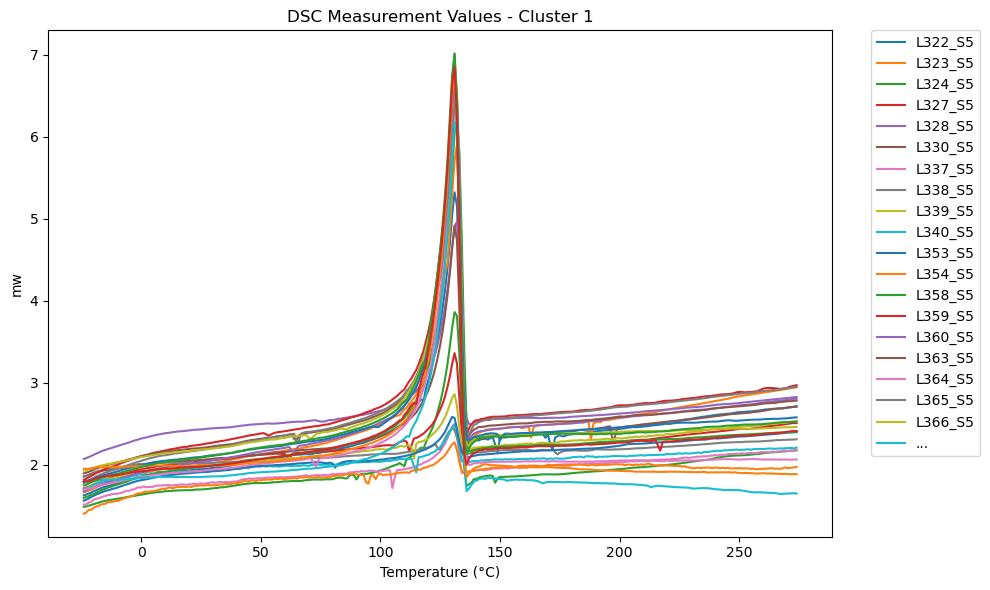

In [15]:
plot_dsc_values(df_experiments_s5, cluster_to_samples[1], title = "DSC Measurement Values - Cluster 1")

### Cluster 2 - 5

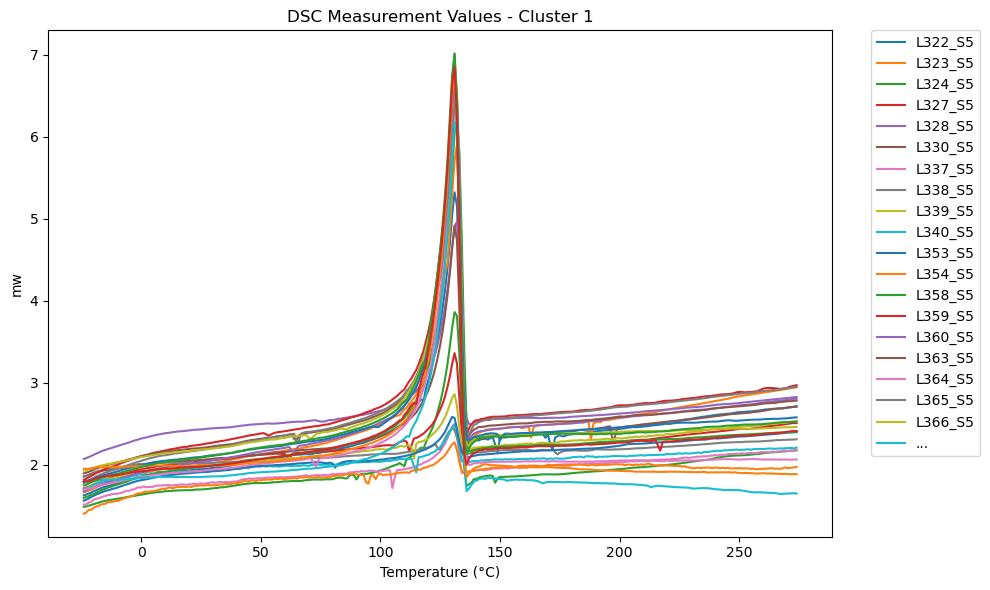

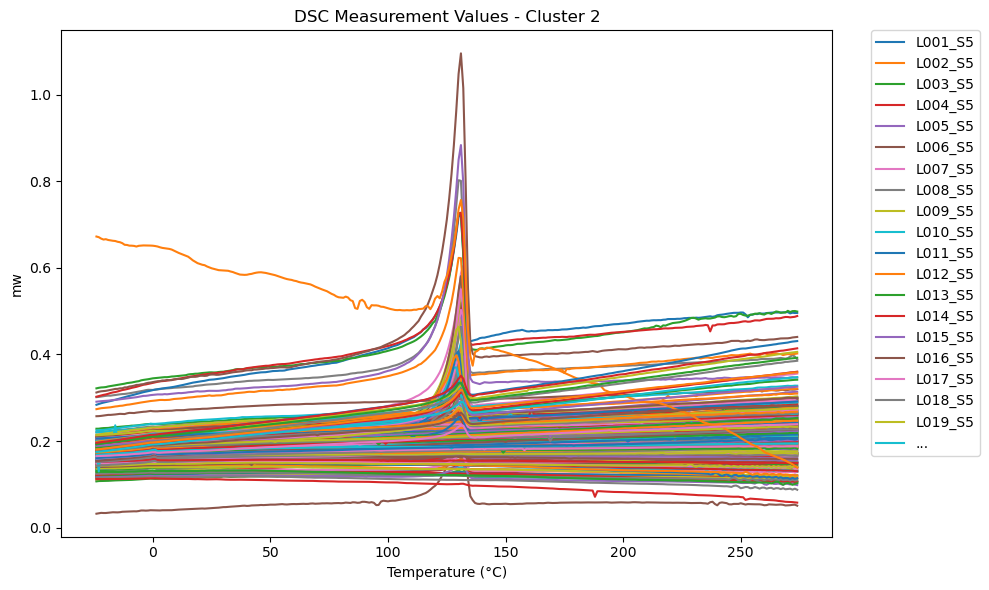

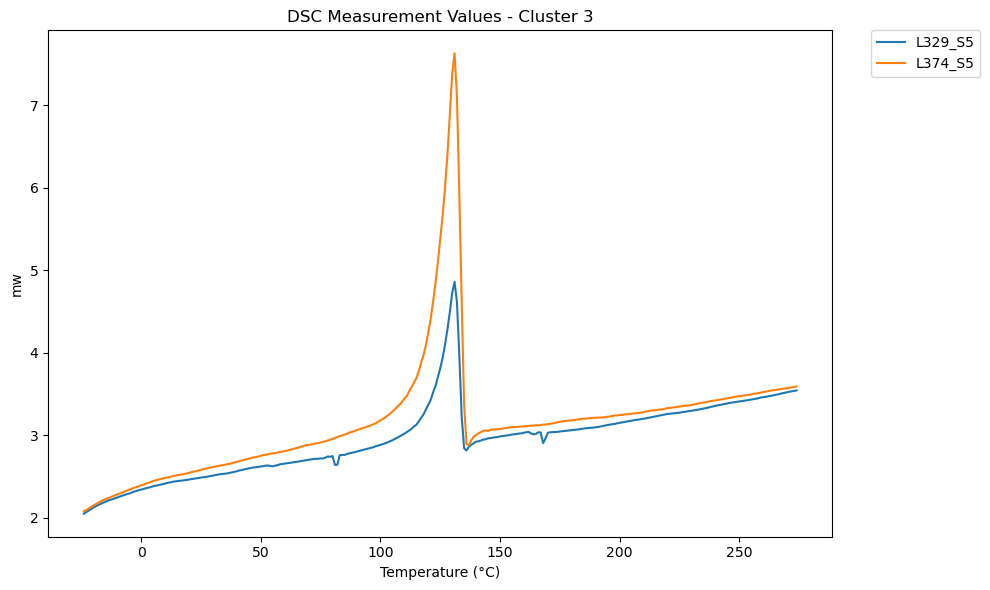

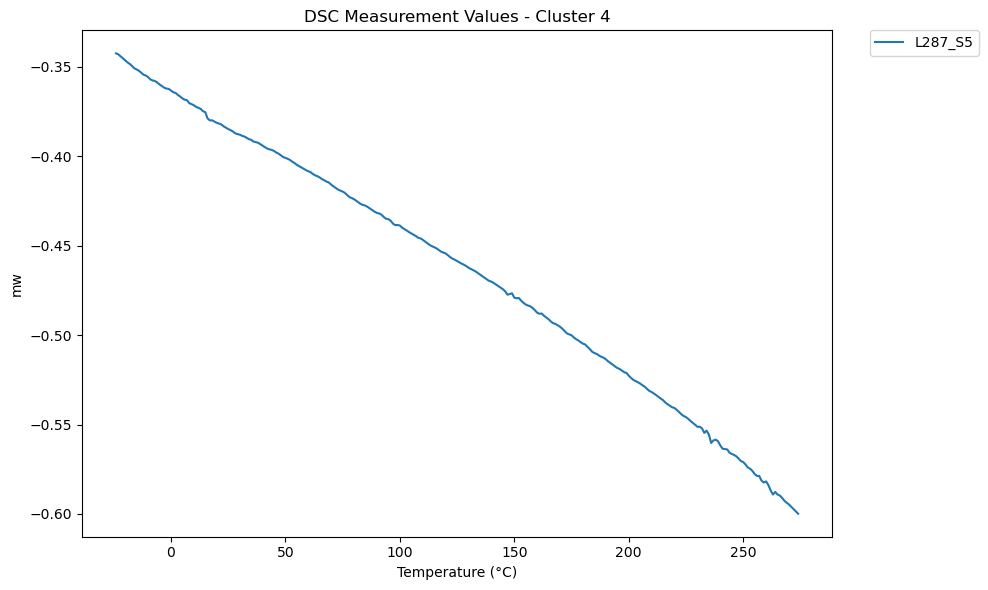

In [17]:
for cluster, samples in list(cluster_to_samples.items())[1:]:
    title = f"DSC Measurement Values - Cluster {cluster}"
    plot_dsc_values(df_experiments_s5, samples, title=title)


### "Matrix"-Werte pro Cluster

In [19]:
# Beispiel-Daten (cluster_to_samples und df_dsc müssen definiert sein)
results = analyze_clusters_with_percentages(cluster_to_samples, df_dsc)

# Ausgabe der Ergebnisse
for cluster, df in results.items():
    print(f"Cluster: {cluster}")
    print(df)
    print("-" * 50)


Cluster: 0
                    Count  Anteil (%)
Matrix                               
Sediment Weißeritz     14       51.85
Sediment Elbe           8       29.63
Sand                    5       18.52
--------------------------------------------------
Cluster: 1
                    Count  Anteil (%)
Matrix                               
Sand                   12        50.0
Sediment Elbe           9        37.5
Sediment Weißeritz      3        12.5
--------------------------------------------------
Cluster: 2
                    Count  Anteil (%)
Matrix                               
Modellsand             90       29.61
Sediment Weißeritz     45       14.80
Sediment Elbe          44       14.47
Sand                   39       12.83
Nicht vorhanden        86       28.29
--------------------------------------------------
Cluster: 3
               Count  Anteil (%)
Matrix                          
Sediment Elbe      1        50.0
Sand               1        50.0
-------------------------

## II) Mit Mittelwerten der Intervalle

In [21]:
file_path = "data/041a_mean_clustering.csv"
df_clustering_mean = pd.read_csv(file_path, index_col=0)
df_clustering_mean.head()

,Probe,Cluster
0,L001_S5,3
1,L002_S5,3
2,L003_S5,3
3,L004_S5,3
4,L005_S5,3


In [22]:
df_clustering_mean["Cluster"].value_counts()

Cluster
3    305
0     15
1     14
4     14
2     10
Name: count, dtype: int64

In [23]:
cluster_to_samples = df_clustering_mean.groupby('Cluster')['Probe'].apply(list).to_dict()
for cluster, samples in cluster_to_samples.items():
    print(f"Cluster {cluster}:")
    print(samples ,"\n")

Cluster 0:
['L322_S5', 'L323_S5', 'L328_S5', 'L329_S5', 'L330_S5', 'L358_S5', 'L359_S5', 'L360_S5', 'L363_S5', 'L365_S5', 'L366_S5', 'L370_S5', 'L373_S5', 'L374_S5', 'L375_S5'] 

Cluster 1:
['L324_S5', 'L327_S5', 'L337_S5', 'L338_S5', 'L339_S5', 'L340_S5', 'L353_S5', 'L354_S5', 'L361_S5', 'L362_S5', 'L364_S5', 'L367_S5', 'L369_S5', 'L372_S5'] 

Cluster 2:
['L325_S5', 'L342_S5', 'L345_S5', 'L346_S5', 'L347_S5', 'L350_S5', 'L351_S5', 'L355_S5', 'L368_S5', 'L371_S5'] 

Cluster 3:
['L001_S5', 'L002_S5', 'L003_S5', 'L004_S5', 'L005_S5', 'L006_S5', 'L007_S5', 'L008_S5', 'L009_S5', 'L010_S5', 'L011_S5', 'L012_S5', 'L013_S5', 'L014_S5', 'L015_S5', 'L016_S5', 'L017_S5', 'L018_S5', 'L019_S5', 'L020_S5', 'L021_S5', 'L022_S5', 'L023_S5', 'L024_S5', 'L025 BW_S5', 'L026-BW_S5', 'L027_S5', 'L028_S5', 'L029_S5', 'L030_S5', 'L031_S5', 'L032_S5', 'L033_S5', 'L034_S5', 'L035_S5', 'L036_S5', 'L037_S5', 'L038_S5', 'L039_S5', 'L040_S5', 'L041_S5', 'L042_S5', 'L043_S5', 'L044_S5', 'L045_S5', 'L046_S5', 'L047

### Cluster 1 - 5

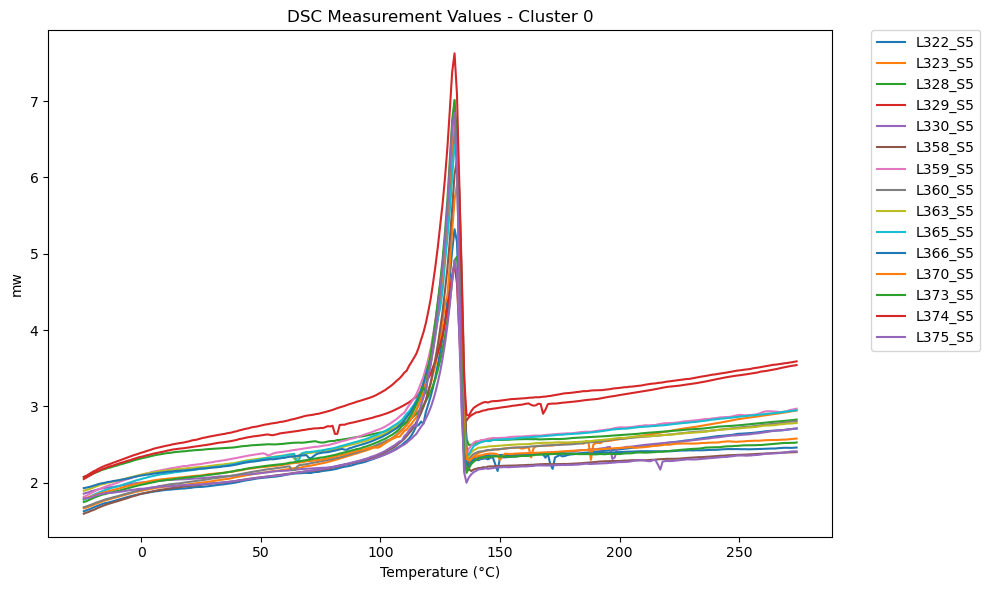

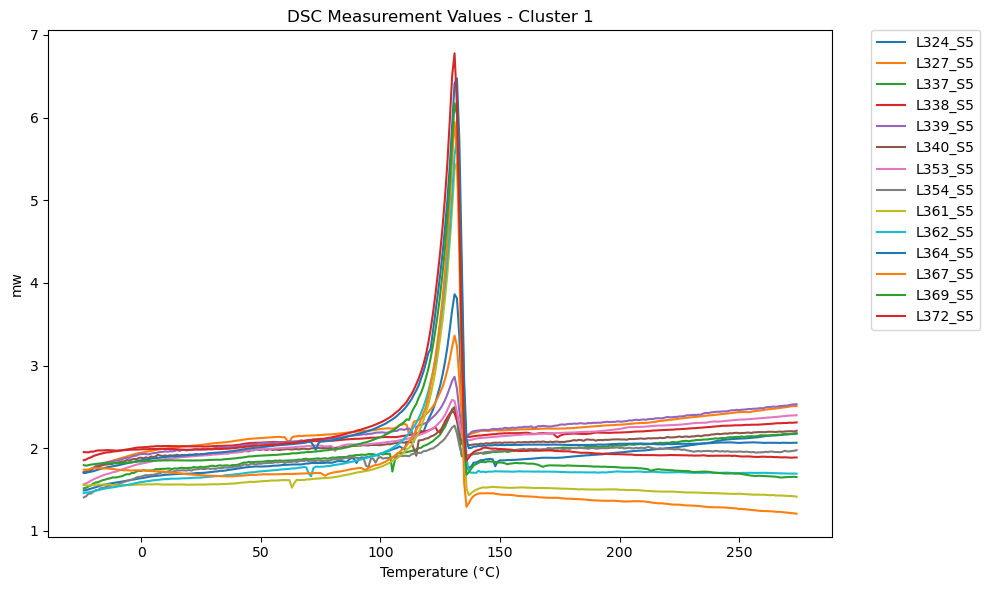

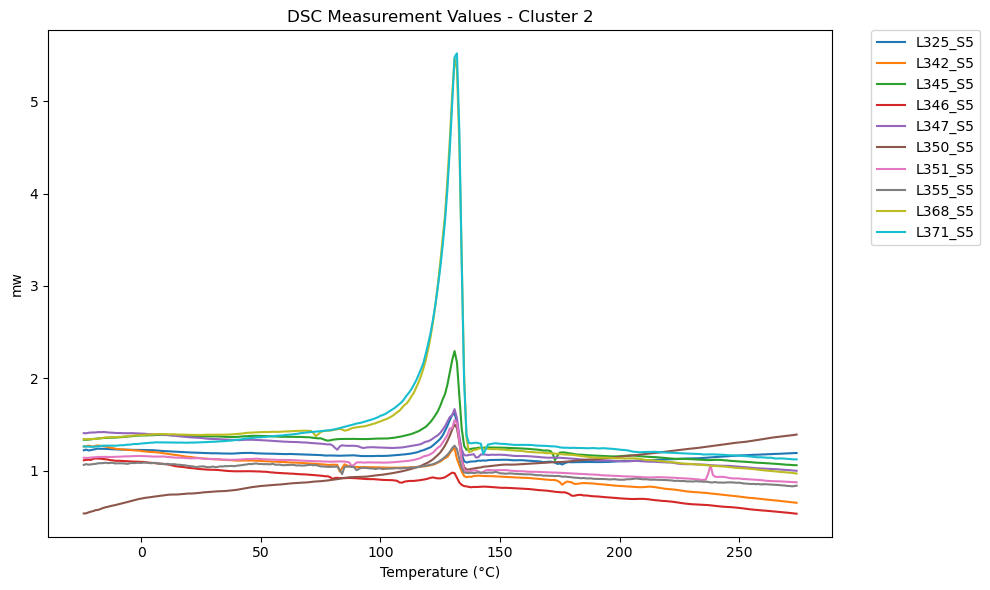

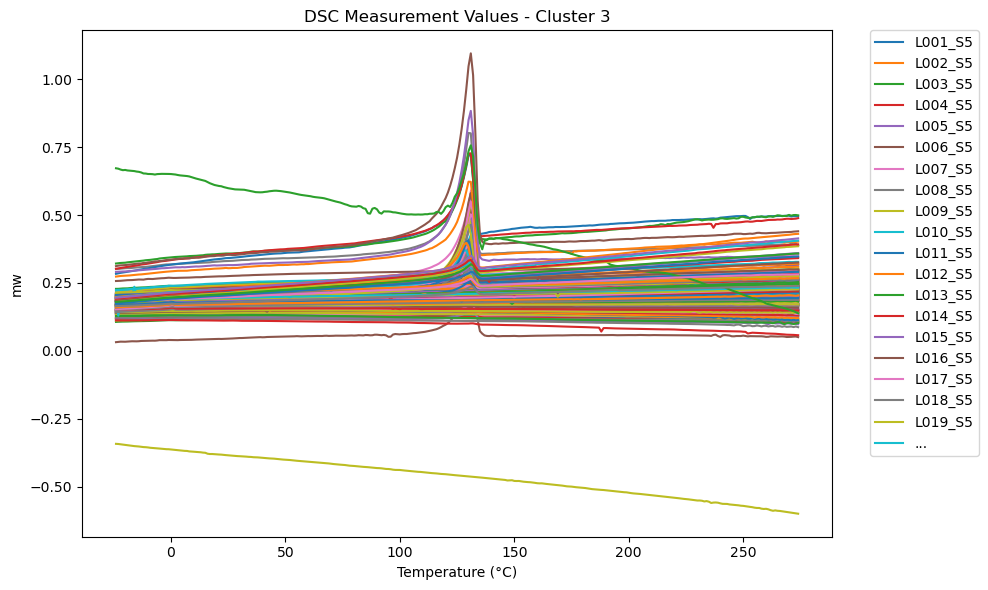

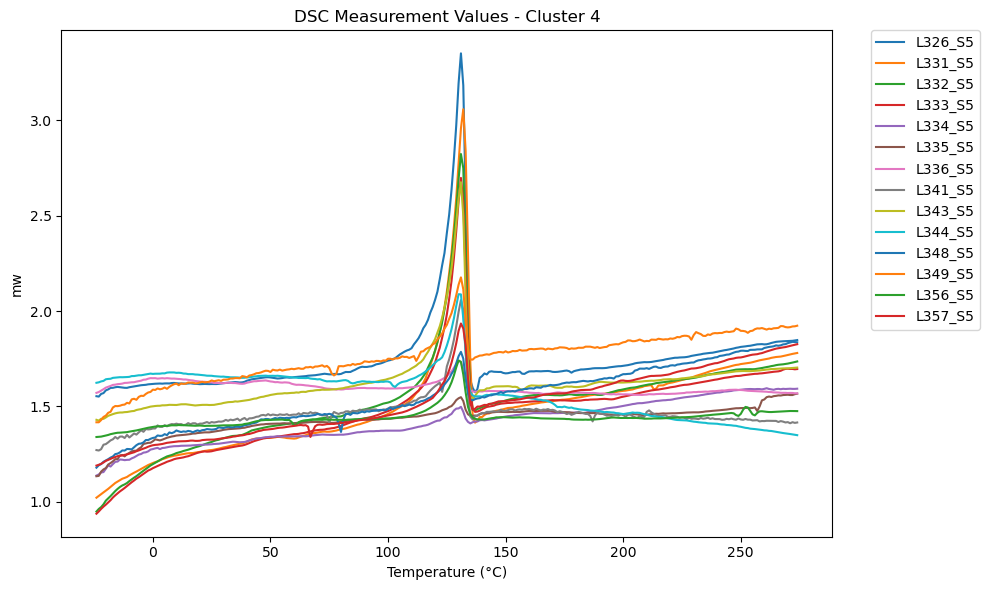

In [25]:
for cluster, samples in list(cluster_to_samples.items()):
    title = f"DSC Measurement Values - Cluster {cluster}"
    plot_dsc_values(df_experiments_s5, samples, title=title)

In [26]:
# Beispiel-Daten (cluster_to_samples und df_dsc müssen definiert sein)
results = analyze_clusters_with_percentages(cluster_to_samples, df_dsc)

# Ausgabe der Ergebnisse
for cluster, df in results.items():
    print(f"Cluster: {cluster}")
    print(df)
    print("-" * 50)

Cluster: 0
               Count  Anteil (%)
Matrix                          
Sand              10       66.67
Sediment Elbe      5       33.33
--------------------------------------------------
Cluster: 1
                    Count  Anteil (%)
Matrix                               
Sand                    6       42.86
Sediment Elbe           5       35.71
Sediment Weißeritz      3       21.43
--------------------------------------------------
Cluster: 2
                    Count  Anteil (%)
Matrix                               
Sediment Weißeritz      7        70.0
Sand                    2        20.0
Sediment Elbe           1        10.0
--------------------------------------------------
Cluster: 3
                    Count  Anteil (%)
Matrix                               
Modellsand             90       29.51
Sediment Weißeritz     45       14.75
Sediment Elbe          45       14.75
Sand                   39       12.79
Nicht vorhanden        86       28.20
-------------------------

## III) Mit je Cluster-Zuweisung pro Intervall

In [28]:
file_path = "data/042_interval_multiple_clustering.csv"
df_clustering_mult = pd.read_csv(file_path, index_col=0)
df_clustering_mult.head()

,"[-25, -5)","[-5, 15)","[15, 35)","[35, 55)","[55, 75)","[75, 95)","[95, 115)","[115, 135)","[135, 155)","[155, 175)","[175, 195)","[195, 215)","[215, 235)","[235, 255)","[255, 275)",Overall_Cluster
Probe,,,,,,,,,,,,,,,,
L001_S5,1,1,4,4,4,2,2,1,2,1,5,2,5,0,2,1
L002_S5,1,1,4,4,4,2,2,1,2,1,5,2,5,0,2,1
L003_S5,1,1,4,4,4,2,2,1,2,1,5,2,5,0,2,1
L004_S5,1,1,4,4,4,2,2,1,2,1,5,2,5,0,2,1
L005_S5,1,1,4,4,4,2,2,1,2,1,5,2,5,0,2,1


In [29]:
df_clustering_mult["Overall_Cluster"].value_counts()

Overall_Cluster
1    327
2     17
0      7
5      4
3      2
4      1
Name: count, dtype: int64

In [30]:
# Gruppieren, da 'Probe' der Index ist
cluster_to_samples = (
    df_clustering_mult
    .reset_index()  # Macht 'Probe' zu einer regulären Spalte
    .groupby('Overall_Cluster')['Probe']
    .apply(list)
    .to_dict()
)

# Ausgabe in der gewünschten Formatierung
for cluster, samples in cluster_to_samples.items():
    print(f"Cluster {cluster}:")
    print(samples, "\n")


Cluster 0:
['L324_S5', 'L337_S5', 'L340_S5', 'L349_S5', 'L354_S5', 'L364_S5', 'L372_S5'] 

Cluster 1:
['L001_S5', 'L002_S5', 'L003_S5', 'L004_S5', 'L005_S5', 'L006_S5', 'L007_S5', 'L008_S5', 'L009_S5', 'L010_S5', 'L011_S5', 'L012_S5', 'L013_S5', 'L014_S5', 'L015_S5', 'L016_S5', 'L017_S5', 'L018_S5', 'L019_S5', 'L020_S5', 'L021_S5', 'L022_S5', 'L023_S5', 'L024_S5', 'L025 BW_S5', 'L026-BW_S5', 'L027_S5', 'L028_S5', 'L029_S5', 'L030_S5', 'L031_S5', 'L032_S5', 'L033_S5', 'L034_S5', 'L035_S5', 'L036_S5', 'L037_S5', 'L038_S5', 'L039_S5', 'L040_S5', 'L041_S5', 'L042_S5', 'L043_S5', 'L044_S5', 'L045_S5', 'L046_S5', 'L047_S5', 'L048_S5', 'L049_S5', 'L050_S5', 'L051_S5', 'L052_S5', 'L053_S5', 'L054_S5', 'L055_S5', 'L056_S5', 'L057_S5', 'L058_S5', 'L059_S5', 'L060_S5', 'L061_S5', 'L062_S5', 'L063_S5', 'L064_S5', 'L065_S5', 'L066_S5', 'L067_S5', 'L068_S5', 'L069_S5', 'L070_S5', 'L071_S5', 'L072_S5', 'L073_S5', 'L074_S5', 'L075_S5', 'L076_S5', 'L077_S5', 'L079_S5', 'L080_S5', 'L081_S5', 'L082_S5', 

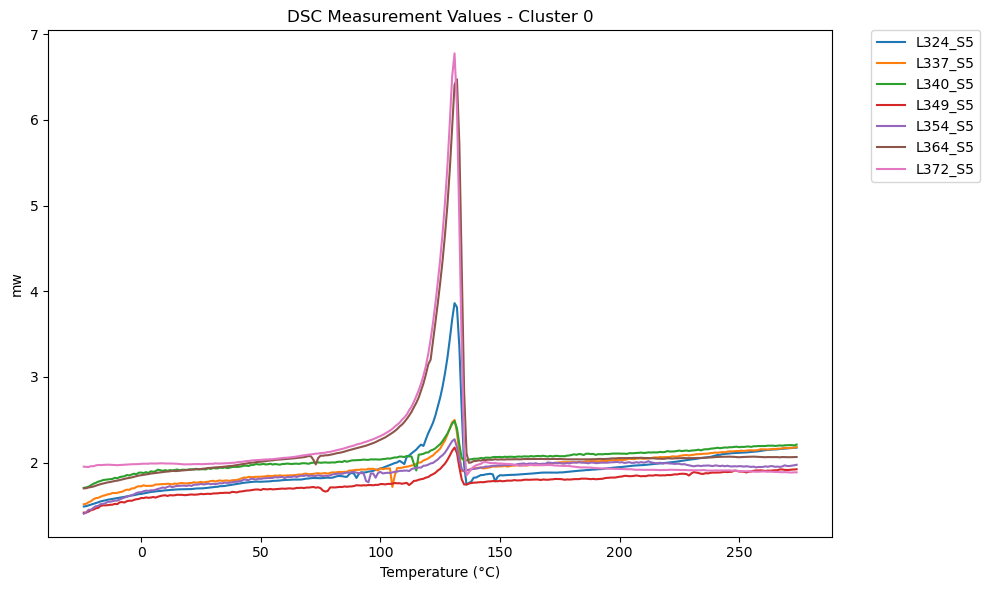

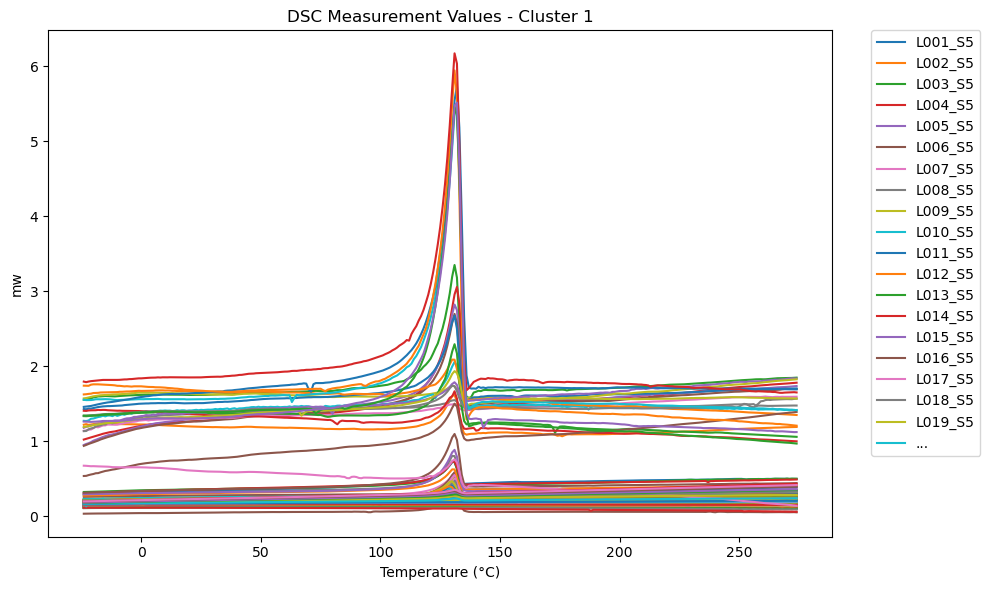

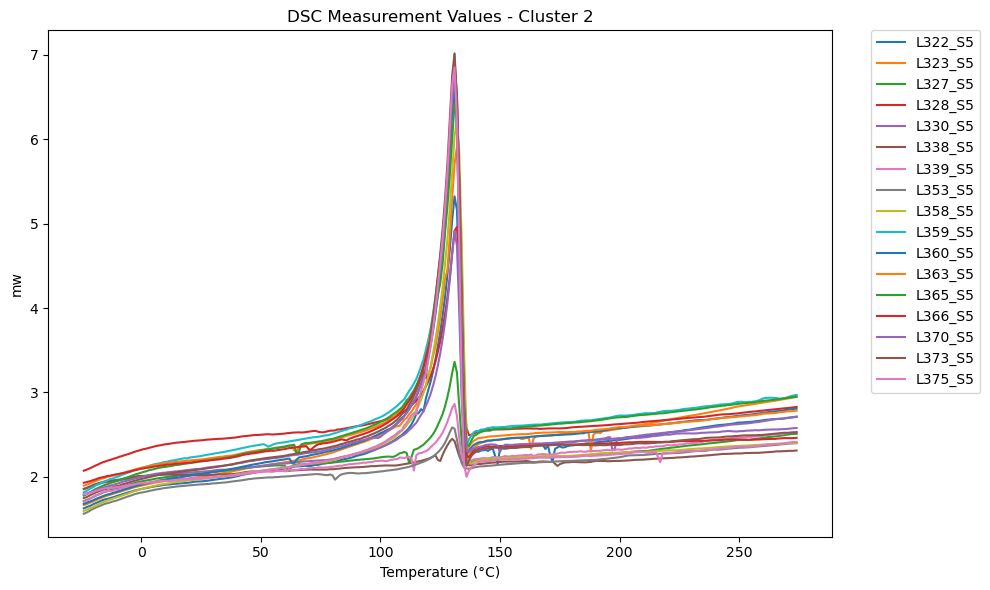

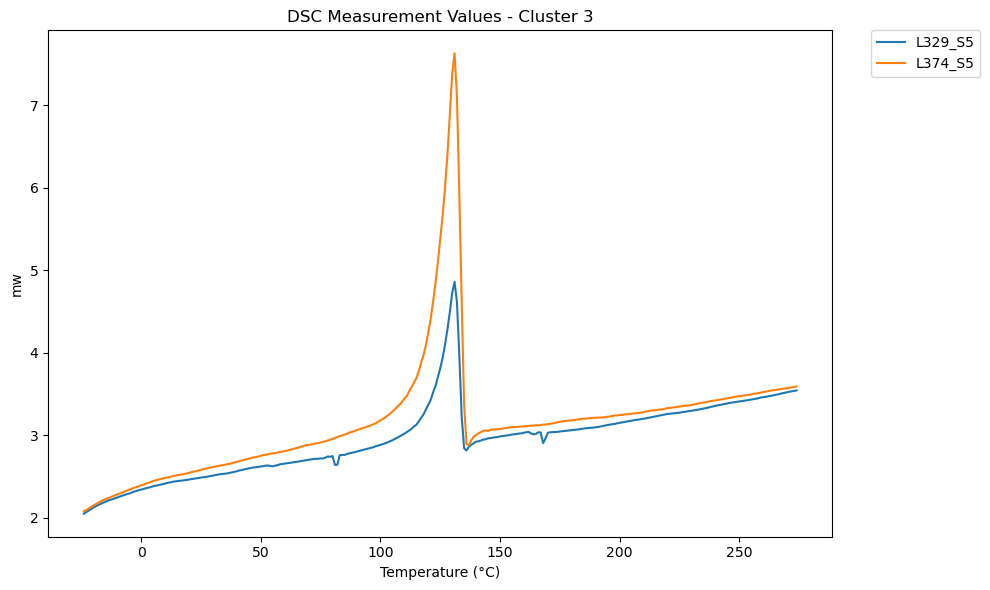

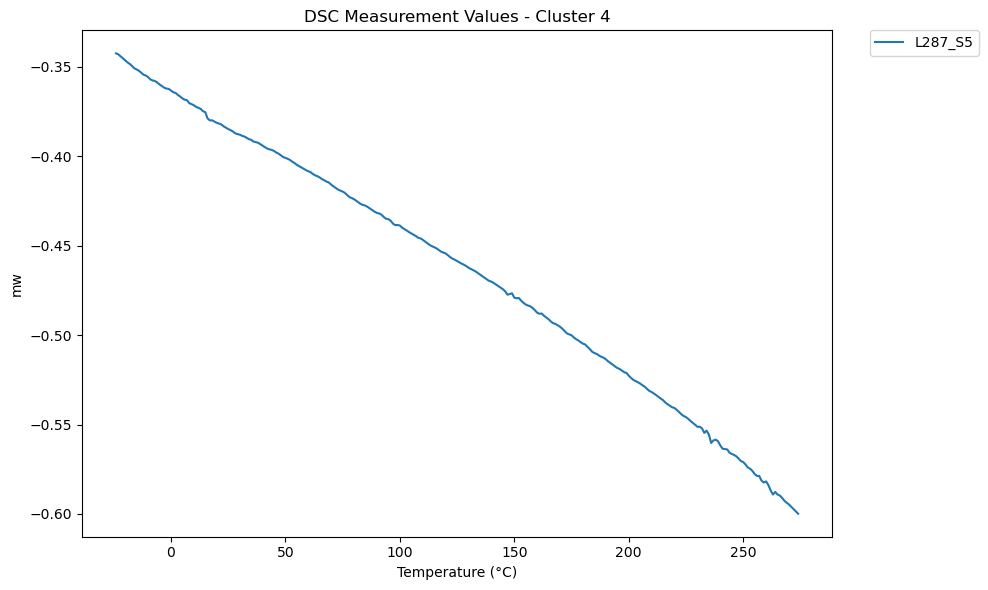

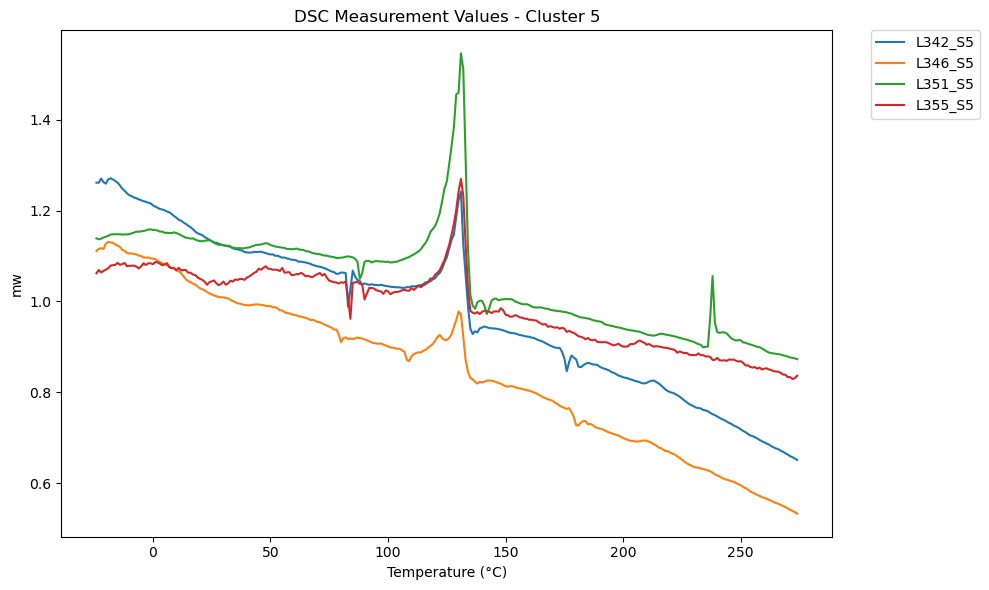

In [31]:
for cluster, samples in list(cluster_to_samples.items()):
    title = f"DSC Measurement Values - Cluster {cluster}"
    plot_dsc_values(df_experiments_s5, samples, title=title)

In [32]:
# Beispiel-Daten (cluster_to_samples und df_dsc müssen definiert sein)
results = analyze_clusters_with_percentages(cluster_to_samples, df_dsc)

# Ausgabe der Ergebnisse
for cluster, df in results.items():
    print(f"Cluster: {cluster}")
    print(df)
    print("-" * 50)

Cluster: 0
                    Count  Anteil (%)
Matrix                               
Sediment Weißeritz      3       42.86
Sediment Elbe           2       28.57
Sand                    2       28.57
--------------------------------------------------
Cluster: 1
                    Count  Anteil (%)
Matrix                               
Modellsand             90       27.52
Sediment Weißeritz     54       16.51
Sediment Elbe          52       15.90
Sand                   45       13.76
Nicht vorhanden        86       26.30
--------------------------------------------------
Cluster: 2
                    Count  Anteil (%)
Matrix                               
Sand                    9       52.94
Sediment Elbe           7       41.18
Sediment Weißeritz      1        5.88
--------------------------------------------------
Cluster: 3
               Count  Anteil (%)
Matrix                          
Sediment Elbe      1        50.0
Sand               1        50.0
-------------------------